In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Para ver los gráficos dentro del notebook
%matplotlib inline

# Cargamos el dataset ( el mismo de antes)
df = pd.read_csv("../Data/downtime_events.csv")

# Convertir timestamps a datetime  ( por si este notebook se usa de forma independiente)
df["timestamp_start"] = pd.to_datetime(df["timestamp_start"], format="ISO8601")
df["timestamp_end"] = pd.to_datetime(df["timestamp_end"], format="ISO8601")

# Features de tiempo que vamos a usar
df["date"] = df["timestamp_start"].dt.date
df["month"] = df["timestamp_start"].dt.to_period("M")   # año-mes
df["weekday"] = df["timestamp_start"].dt.day_name() # nombre del día de la semana

df.head()

,event_id,timestamp_start,timestamp_end,line_id,station_id,robot_id,failure_code,failure_category,downtime_minutes,shift,pieces_lost,day_of_week,date,month,weekday
0,1,2024-06-12 03:01:00,2024-06-12 03:12:43.902135,FinalAssembly,FA_Station_02,R008,E01,mechanical,12.9,night,1,Wednesday,2024-06-12,2024-06,Wednesday
1,2,2024-01-27 21:47:00,2024-01-27 21:51:14.394438,FinalAssembly,FA_Conv_01,R019,E02,electrical,4.2,afternoon,2,Saturday,2024-01-27,2024-01,Saturday
2,3,2024-01-08 02:13:00,2024-01-08 02:14:29.758153,BodyShop,BS_Weld_01,R018,E01,mechanical,1.7,night,1,Monday,2024-01-08,2024-01,Monday
3,4,2024-06-15 22:34:00,2024-06-15 23:04:46.875093,PaintShop,PS_Paint_01,R015,E03,programming,33.9,night,12,Saturday,2024-06-15,2024-06,Saturday
4,5,2024-01-02 05:44:00,2024-01-02 05:45:00.000000,PaintShop,PS_Oven_01,R009,E01,mechanical,1.1,night,0,Tuesday,2024-01-02,2024-01,Tuesday


In [3]:
# Downtime total por línea
downtime_by_line = (
    df.groupby("line_id")["downtime_minutes"]
      .sum()
      .sort_values(ascending=False)
)

downtime_by_line


line_id
BodyShop         70313.3
FinalAssembly    68776.3
PaintShop        65934.0
Name: downtime_minutes, dtype: float64

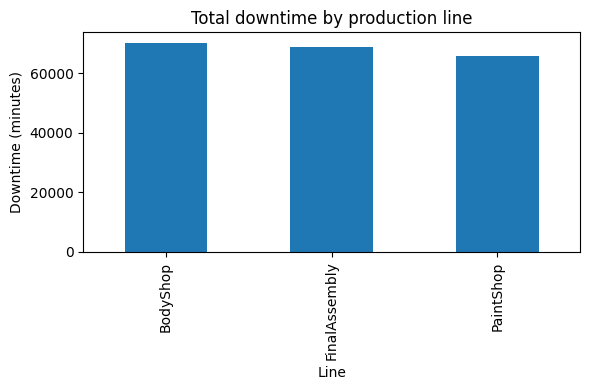

In [4]:
plt.figure(figsize=(6, 4))
downtime_by_line.plot(kind="bar")
plt.title("Total downtime by production line")
plt.ylabel("Downtime (minutes)")
plt.xlabel("Line")
plt.tight_layout()
plt.show()


In [6]:
downtime_by_shift = (
    df.groupby("shift")["downtime_minutes"]
    .sum()
    .sort_values(ascending=False)
)

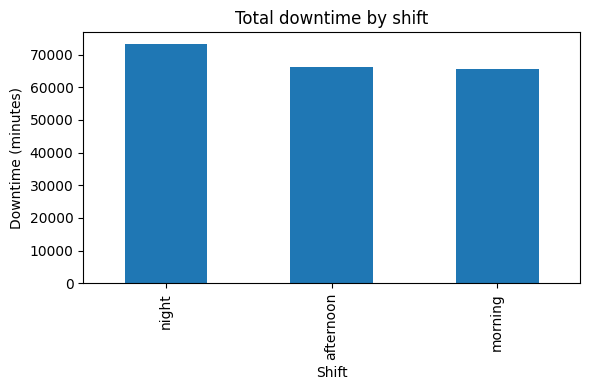

In [9]:
plt.figure(figsize=(6,4))
downtime_by_shift.plot(kind="bar")
plt.title("Total downtime by shift")
plt.ylabel("Downtime (minutes)")
plt.xlabel("Shift")
plt.tight_layout()
plt.show()

In [11]:
# Downtime by category
downtime_by_category = (
    df.groupby("failure_category")["downtime_minutes"]
    .sum()
    .sort_values(ascending=False)
)

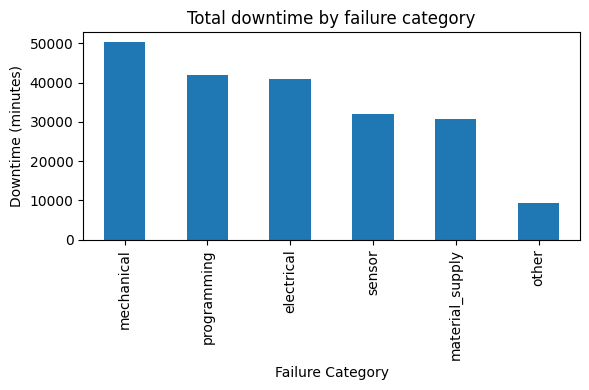

In [12]:
plt.figure(figsize=(6,4))
downtime_by_category.plot(kind="bar")
plt.title("Total downtime by failure category")
plt.ylabel("Downtime (minutes)")
plt.xlabel("Failure Category")
plt.tight_layout()
plt.show()

In [15]:
# Top failure codes by downtime
downtime_by_code = (
    df.groupby("failure_code")["downtime_minutes"]
    .sum()
    .sort_values(ascending=False)
)

In [ ]:
plt.figure(figsize=(6, 4))
downtime_by_code.plot(kind="bar")
plt.title("downtime by code")
plt.ylabel("downtime (minutes")
plt.xlabel("Failure code")
plt.tight_layout()
plt.show()